In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
tf.keras.backend.clear_session()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


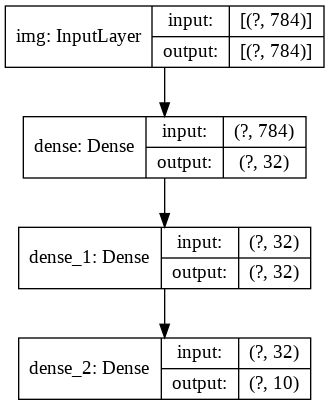

In [2]:
inputs = tf.keras.Input(shape=(784,), name='img')
h1 = layers.Dense(32, activation='relu')(inputs)
h2 = layers.Dense(32, activation='relu')(h1)
outputs = layers.Dense(10, activation='softmax')(h2)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

model.summary()
keras.utils.plot_model(model, 'mnist_model.png')
keras.utils.plot_model(model, 'model_info.png', show_shapes=True)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') /255
x_test = x_test.reshape(10000, 784).astype('float32') /255
model.compile(optimizer=keras.optimizers.RMSprop(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)
test_scores = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', test_scores[0])
print('test acc:', test_scores[1])

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
750/750 [==============================] - 1s 2ms/step - loss: 0.4362 - accuracy: 0.8762 - val_loss: 0.2732 - val_accuracy: 0.9235
Epoch 2/5
750/750 [==============================] - 1s 2ms/step - loss: 0.2213 - accuracy: 0.9352 - val_loss: 0.1947 - val_accuracy: 0.9442
Epoch 3/5
750/750 [==============================] - 1s 2ms/step - loss: 0.1763 - accuracy: 0.9474 - val_loss: 0.1821 - val_accuracy: 0.9482
Epoch 4/5
750/750 [==============================] - 1s 2ms/step - loss: 0.1501 - accuracy: 0.9559 - val_loss: 0.1531 - val_accuracy: 0.9563
Epoch 5/5
750/750 [==============================] - 1s 2ms/step - loss: 0.1303 - accuracy: 0.9611 - val_loss: 0.1548 - val_accuracy: 0.9542
test loss: 0.14934803545475006
test acc: 0.9544000029563904


In [4]:
model.save('model_save.h5')
del model
model = keras.models.load_model('model_save.h5')

In [5]:
share_embedding = layers.Embedding(1000, 64)

input1 = keras.Input(shape=(None,), dtype='int32')
input2 = keras.Input(shape=(None,), dtype='int32')

feat1 = share_embedding(input1)
feat2 = share_embedding(input1)

In [7]:
from tensorflow.keras.applications import VGG16
import numpy as np

vgg16 = VGG16()
feature_list = [layer.output for layer in vgg16.layers]
feat_ext_model = keras.Model(inputs=vgg16.input, outputs=feature_list)

img = np.random.random((1, 224, 224, 3)).astype('float32')
# 用于提取特征
ext_features = feat_ext_model(img)